<div style="padding: -5px;
  text-align: center;
  color: white;
  font-size: 20px;">
   <img src="images/banner.jpg" alt="MINE-Seminario de programación" style="width:100%;">
  <h1 style="
  position: absolute;
  top: 5%;
  left: 50%;">Regresión Logística</h1>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Matriz-de-Confusión" data-toc-modified-id="Matriz-de-Confusión-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matriz de Confusión</a></span></li><li><span><a href="#Validación-cruzada" data-toc-modified-id="Validación-cruzada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Validación cruzada</a></span></li><li><span><a href="#Regresión-Logística" data-toc-modified-id="Regresión-Logística-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regresión Logística</a></span></li><li><span><a href="#Implementación-en-Python" data-toc-modified-id="Implementación-en-Python-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementación en Python</a></span></li><li><span><a href="#Guardar-el-modelo" data-toc-modified-id="Guardar-el-modelo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Guardar el modelo</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Métodos de clasificación supervisada


La clasificación supervisada es una de las tares que más frecuentemente son llevadas a cabo por los denominados Sistemas Inteligentes. Por lo tanto, un gran número de paradigmas desarrollados bien por la Estadística (Regresión Logística, Análisis Discriminante) o bien por la Inteligencia Artificial (Redes Neuronales, Inducción de Reglas, Árboles de Decisión, Redes Bayesianas) son capaces de realizar las tareas propias de la clasificación.

La idea fundamental de este proceso es establecer un modelo que se entrena a partir de la clasificaciones conocidas, es decir, sobre la base estima una división en el siguiente sentido:

||**Datos de Entrada**|**Variable Objetivo**|
|:--:|:-----:|:--:|
||||
||$\begin{bmatrix} X_{1}& X_{2}& X_{3}& \cdots& X_{p}\end{bmatrix}$|$Y$|
|**Entrenamiento**| $\begin{bmatrix}x_{11}& x_{12}&x_{13}&\cdots&x_{1p} \\x_{21}& x_{22}&x_{23}&\cdots&x_{2p} \\ \vdots& \vdots&\vdots&\ddots&\vdots\\ x_{k1}& x_{k2}&x_{k3}&\cdots&x_{kp} \\\end{bmatrix}$|$\begin{bmatrix}Y_{1}\\ Y_{2}\\\vdots\\Y_{k}\end{bmatrix}$|
||$\ \begin{bmatrix}X_{1}& X_{2}&X_{3}&\cdots&X_{p}\end{bmatrix}$|$Y$|
||||
|**Testeo**|$\begin{bmatrix}x_{(k+1)1}& x_{(k+1)2}&x_{(k+1)3}&\cdots&x_{(k+1)p}\\ x_{(k+2)1}& x_{(k+2)2}&x_{(k+2)3}&\cdots&x_{(k+2)p}\\ \vdots& \vdots&\vdots&\ddots&\vdots\\ x_{n1}& x_{n2}&x_{n3}&\cdots&x_{np}\\\end{bmatrix}$|$\begin{bmatrix}Y_{(k+1)}\\ Y_{(k+2)}\\\vdots\\Y_{n}\end{bmatrix}$

Con la primera base de $k$ registros se estiman los parámetros del modelo  y con lo demás se prueba que tan eficiente es para clasificar. Iniciamos estudiando los estadísticos que permiten validar el modelo.






In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

array([[0, 2],
       [1, 1]], dtype=int64)



##  Matriz de Confusión

Supongamos por un momento que ya entrenamos un modelo, lo que debemos hacer a continuación es verificar su eficiencia con la base de testeo, suponiendo que la variable objetivo es  booleana tenemos cuatro casos posibles:

* Verdaderos Positivos **VP**.
* Verdaderos Negativos **VN**.
* Falsos Positivos **FP**, (Predicho Verdadero - Real Falso) Error Tipo 1.
* Falsos Negativos **FN**, (Predicho Falso - Real Verdadero) Error tipo 2.

El conteo de estos valores conforman la matriz de confusión:

<table align="center">

<tbody><tr>
<th colspan="2">&#160;
</th>
<th colspan="2" align="center">Valor en la realidad
</th></tr>
<tr>
<th colspan="2">&#160;</th>
<th><i>p</i></th>
<th><i>n</i></th>
<th style="padding-left:1em;">total
</th></tr>
<tr>
<th rowspan="2" valign="middle">Predicción<br />outcome
</th>
<th valign="middle" style="padding-right:1em;"><i>p'</i>
</th>
<td style="border:thin solid; padding:1em;">Verdaderos<br />Positivos</td>
<td style="border:thin solid; padding:1em;">Falsos<br />Positivos
</td>
<td style="padding-left:1em;">P'
</td></tr>
<tr>
<th valign="middle" style="padding-right:1em;"><i>n'</i>
</th>
<td style="border:thin solid; padding:1em;">Falsos<br />Negativos</td>
<td style="border:thin solid; padding:1em;">Verdaderos<br />Negativos
</td>
<td style="padding-left:1em;">N'
</td></tr>
<tr>
<th colspan="2" align="right" style="padding-right:1em;">total
</th>
<td align="center">P</td>
<td align="center">N
</td></tr></tbody></table>


de esta tabla obtenemos las siguientes medidas:


* **Exactitud (accuracy):** $$\cfrac{VP+VN}{Total}$$

* **Sensibilidad (Recall):** $$\cfrac{VP}{Positivos}=\cfrac{VP}{VP+FN}$$

* **Especificidad:** $$\cfrac{VN}{Negativos}=\cfrac{VN}{FP+VN}$$

* **Precisión:** $$\cfrac{VP}{VP+FP}$$

* **F1-Score:** $$2*\cfrac{Prec\cdot Recall}{Prec+Recall}$$

* **AUC(ROC):** Área bajo la curva que compara (1-especificidad) y la sensibilidad. 




## Validación cruzada

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un análisis estadístico cuando el conjunto de datos se ha segmentado en una muestra de entrenamiento y otra de prueba, la validación cruzada comprueba si los resultados del análisis son independientes de la partición. Aunque la validación cruzada es una técnica diseñada para modelos de regresión y predicción, su uso se ha extendido a muchos otros ejercicios de machine learning.

![ValCruza](https://bookdown.org/content/2274/Esquema.jpg)
Figura 1: Validación cruzada(De Joan.domenech91 - Trabajo propio, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=17617674) 

El método de validación cruzada más utilizado se conoce como la validación cruzada de K iteraciones o K-fold cross-validation. Aquí, el total de los datos se dividen en $k$ subconjuntos, utilizamos cada subconjunto distinto para validar el modelo entrenado con los otros k-1 subconjuntos. El error medio obtenido de los k análisis realizados nos proporciona el error cometido por el método. En la práctica, la elección del número de iteraciones depende de la medida del conjunto de datos. Lo más común es utilizar la validación cruzada de 10 iteraciones (10-fold cross-validation).

![ValCruza2](https://bookdown.org/content/2274/K-fold_cross_validation.jpg)



## Regresión Logística

El primer modelo de clasificación que vamos a desplegar es la regresión logística, este es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

El modelo de regresión lineal (Legendre, Gauss, Galton y Pearson) considera que, dado un conjunto de observaciones $\{y_i, x_{i1},...,x_{np}\}^{n}_{i=1}$, la media $\mu$ de la variable respuesta $y$ se relaciona de forma lineal con la o las variables regresoras $x_1$ ... $x_p$ acorde a la ecuación:
$$\mu_y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + ... + \beta_p x_{p}$$

El resultado de esta ecuación se conoce como la línea de regresión poblacional, y recoge la relación entre los predictores y la <strong>media</strong> de la variable respuesta.

Otra definición que se encuentra con frecuencia en los libros de estadística es:

$$y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} +\epsilon_i$$

En este caso, se está haciendo referencia al valor de $y$ para una observación $i$ concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error $\epsilon$.

En ambos casos, la interpretación de los elementos del modelo es la misma:

<ul>
<li><p>$\beta_{0}$: es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta $y$ cuando todos los predictores son cero.</p>
</li>
<li><p>$\beta_{p}$: es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora $x_{p}$, manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.</p>
</li>
<li><p>$e$: es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en $y$ pero que no se incluyen en el modelo como predictores.</p>
</li>
</ul>

En la gran mayoría de casos, los valores $\beta_0$ y $\beta_p$ poblacionales se desconocen, por lo que, a partir de una muestra, se obtienen sus estimaciones $\hat{\beta}_0$ y $\hat{\beta}_p$. Ajustar el modelo consiste en estimar, a partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud (<em>likelihood</em>), es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados.

El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (<em>OLS</em>), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

El término "lineal" en los modelos de regresión hace referencia al hecho de que los parámetros se incorporan en la ecuación de forma lineal, no a que necesariamente la relación entre cada predictor y la variable respuesta tenga que seguir un patrón de recta.


<strong>¿Qué ocurre cuando la variable respuesta es binaria, solo dos posibles valores?</strong>
<br>


<p>Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:</p>
<ul>
<li><p>Al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.</p>
</li>
<li><p>Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo [0,1], ya que podrían obtenerse valores fuera de este.</p>
</li>
</ul>
<p>Para evitar estos problemas, la regresión logística (David Cox 1958) transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1. Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):</p>
$$\text{sigmoide} = \sigma(y) = \dfrac{1}{1 + e^{-y}} $$<p>Para valores de $y$ positivos muy grandes, $e^{−y}$ es aproximadamente 0, por lo que el valor de la función sigmoide es 1. Para valores de $y$ negativos muy grandes, $e^{−y}$ tiende a infinito, por lo que el valor de la función sigmoide es 0.</p>
<p>Sustituyendo la $y$ de la ecuación anterior por la función de un modelo lineal $ y = \beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}$ se obtiene que:</p>
$$P(y=1|X=x)= \frac{e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}{1+e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}} \tag{anexo 1}$$<p>donde $P(y=1|X=x)$ puede interpretarse como la probabilidad de que la variable respuesta $y$ adquiera el valor 1 (clase de referencia), dado los predictores $x_1, ..., x_p$.</p>
<p>El modelo resultante tiene los coeficientes de regresión en los exponentes, por lo que no es un modelo lineal y no puede ajustarse con la estrategia descrita al inicio del documento. ¿Cómo evitar este inconveniente?</p>
<p>La expresión obtenida tiene la característica de ser siempre positiva, ya que la función exponencial solo toma valores positivos y, el cociente de valores positivos, es siempre positivo. Esto hace posible aplicarle el logaritmo:</p>
$$ln(\frac{p(y=1|X=x)}{p(y=0|X=x)}) = \beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}  \tag{anexo 2}$$<p>Al realizar la transformación, en el lado derecho se obtiene la ecuación de un modelo lineal. El término de la izquierda resulta ser el logaritmo de un cociente de probabilidades, lo que se conoce como razón de probabilidad (<em>log of odds</em>).</p>
<p>Como resultado de este proceso se consigue convertir un problema de clasificación no lineal, en un problema de regresión lineal que sí puede ajustarse mediante los métodos convencionales.</p>
<p>Una vez obtenidos los coeficientes del modelo ($\beta_0, \beta_1, \cdots, \beta_p$) se puede obtener la probabilidad de que una nueva observación pertenezca a la clase $y=1$ con la ecuación:</p>
$$p(y=1|X=x) = \frac{e^{(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}}{1+e^{(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}}$$<p>Modelar el <em>log of odds</em> es la estrategia matemática que permite encontrar los valores de los coeficientes (ajustar el modelo).</p>


<div class="output_jpeg output_subarea output_execute_result">
<img src="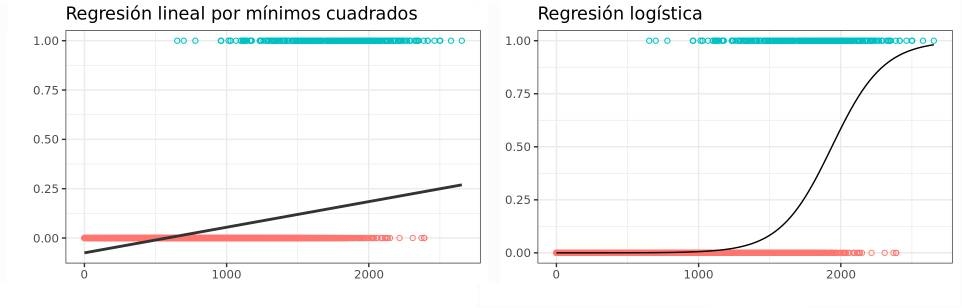
"
width=700
>


<center><font size='2.5'> <i>Modelo de regresión lineal vs  regresión logística para una variable binaria. La línea gris representa la recta de regresión (el modelo).</i></font></center>

<p><strong>Anexo 1</strong>
<br></p>
<p>Combinación de la función sigmoide y la ecuación de un modelo lineal para obtener un modelo que relacione los predictores con la probabilidad de que $y=1$.</p>
$$P(y=1|X=x)=$$$$= \frac{1}{1+e^{-(\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p})}} =$$$$= \frac{1}{\frac{e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}{e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}} + \frac{1}{e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}}=$$$$= \frac{1}{\frac{1 + e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}{e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}}=$$$$= \frac{e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}{1+e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}$$<p><strong>Anexo 2</strong>
<br></p>
<p>Transformación logarítmica para linealizar el modelo.</p>
<p>La probabilidad de que $y=1$ dado los predictores $X=x_1, ..., x_p$ es:</p>
$$P(y=1|X=x) = \frac{e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}}{1+e^{\beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}}} = \frac{e^{\sum \beta_i x_{i}}}{1+e^{\sum \beta_i x_{i}}}$$<p>Al ser un caso de clasificación binaria, la probabilidad de $y=0$ es la probabilidad complementaria:</p>
$$P(y=0|X=x) = 1- P(y=0|X=x) = 1 - \frac{e^{\sum \beta_i x_{i}}}{1+e^{\sum \beta_i x_{i}}} = \frac{1}{1+e^{\sum \beta_i x_{i}}}$$<p>Si se divide una probabilidad entre otra:</p>
$$\frac{P(y=1|X=x)}{P(y=0|X=x)} = \frac{\frac{e^{\sum \beta_i x_{i}}}{1+e^{\sum \beta_i x_{i}}}}{\frac{1}{1+e^{\sum \beta_i x_{i}}}} = e^{\sum \beta_i x_{i}}$$
    
    <br>
    
    
    $$ln(\frac{P(y=1|X=x)}{P(y=0|X=x)}) = ln(e^{\sum \beta_i x_{i}}) = \sum \beta_i x_{i}$$
    
    <br>
    
    $$ln(\frac{P(y=1|X=x)}{P(y=0|X=x)}) = \sum \beta_i x_{i}$$
    
    <br>
    
    $$ln(\frac{P(y=1|X=x)}{P(y=0|X=x)}) = \beta_0 + \beta_1 x_{1} + ... + \beta_p x_{p}$$


## Implementación en Python

In [1]:
url='https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/data/usuarios_win_mac_lin.csv'

In [2]:
import pandas as pd 

Esta es una base de datos que contiene información acerca de usuarios de sistemas operativos. Las clases estan dadas por:

0- Windows
1- Mac
2- Linux

In [4]:
SOdataframe=pd.read_csv(url)
SOdataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [4]:
SOdataframe.dtypes

duracion    float64
paginas       int64
acciones      int64
valor         int64
clase         int64
dtype: object

In [5]:
#import pandas_profiling as ppd

In [6]:
#reportSO=ppd.ProfileReport(SOdataframe,"Resumen SO",explorative=True)
#reportSO.to_file('report.html')

Estadísticos de validación del modelo:

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

Paquetes de soporte y visualización:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

Modulos para generar el modelo:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [10]:
SOdataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [11]:
SOdataframe.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

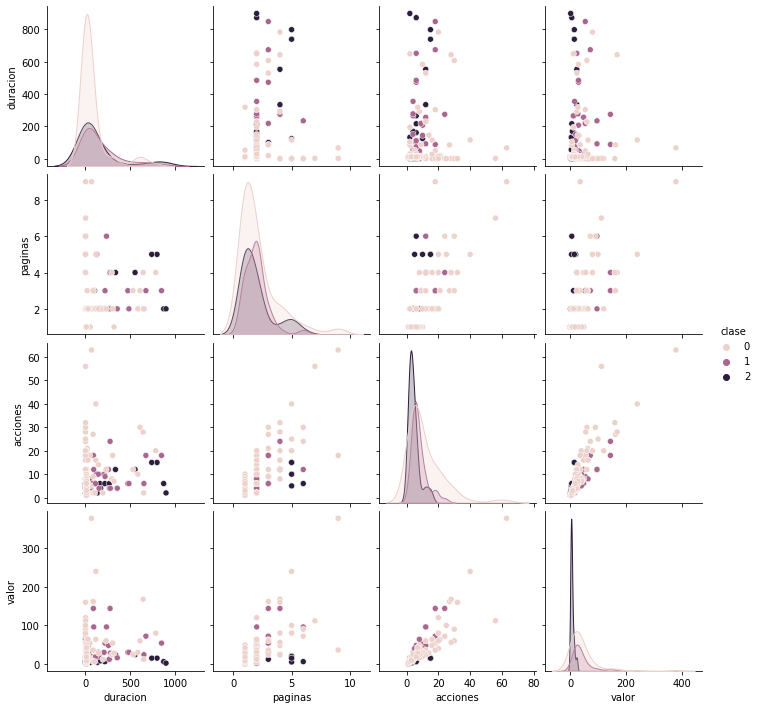

In [12]:
sns.pairplot(SOdataframe.dropna(),hue='clase',vars=['duracion','paginas','acciones','valor'])

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
escala=StandardScaler(with_mean=True, with_std=True) 
pca=PCA(n_components=3)

X=SOdataframe[['duracion','paginas','acciones','valor']]
X=escala.fit_transform(X)
pca.fit_transform(X);

pca.explained_variance_ratio_

array([0.62845714, 0.24417166, 0.09927536])

In [15]:
otrabase=SOdataframe
otrabase['Comp1']=pca.fit_transform(X).T[0]
otrabase['Comp2']=pca.fit_transform(X).T[1]
otrabase['Comp3']=pca.fit_transform(X).T[2]
otrabase

,duracion,paginas,acciones,valor,clase,Comp1,Comp2,Comp3
0,7.0,2,4,8,2,-0.736224,-0.266769,0.473661
1,21.0,2,6,6,2,-0.616391,-0.224453,0.445570
2,57.0,2,4,4,2,-0.737727,-0.008873,0.458290
3,101.0,3,6,12,2,-0.103419,0.182270,0.813541
4,109.0,2,6,12,2,-0.455286,0.154306,0.267013
...,...,...,...,...,...,...,...,...
165,13.0,1,7,42,0,-0.466124,-0.552486,-0.516434
166,12.0,1,2,6,0,-1.247434,-0.262334,-0.011908
167,13.0,1,3,9,0,-1.143134,-0.292406,-0.065005
168,13.0,1,7,28,0,-0.641931,-0.471817,-0.353777


<AxesSubplot:xlabel='Comp1', ylabel='Comp2'>

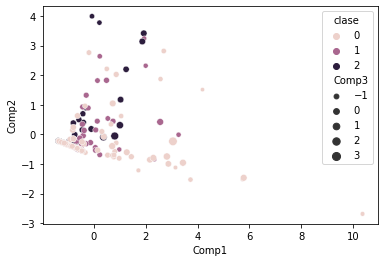

In [16]:
sns.scatterplot(data=otrabase,x='Comp1',y='Comp2',hue='clase',size='Comp3')

* Parto la base por columnas que hacen referencia a las variables de entrada (X) y a la variable de salida (y)

In [19]:
X=SOdataframe[['duracion','paginas','acciones','valor']]
y=SOdataframe['clase']

In [20]:
X

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [21]:
y

0      2
1      2
2      2
3      2
4      2
      ..
165    0
166    0
167    0
168    0
169    0
Name: clase, Length: 170, dtype: int64

+ Particiono la base en una de entrenamiento y otra de testeo

In [22]:
170*0.3

51.0

In [23]:
170*0.7

118.99999999999999

In [28]:
X_entreno,X_testeo,Y_entreno,Y_testeo= train_test_split(X,y,test_size=0.3,random_state=29)

In [30]:
X_entreno.shape

(119, 4)

In [33]:
X_testeo.shape

(51, 4)

In [30]:
Y_entreno

122    2
74     0
76     0
110    2
99     1
      ..
105    1
96     1
40     1
34     1
115    2
Name: clase, Length: 119, dtype: int64

In [52]:
X_entreno

,duracion,paginas,acciones,valor
122,12.0,1,2,2
74,608.0,3,30,60
76,649.0,2,2,12
110,12.0,1,2,2
99,13.0,1,4,12
...,...,...,...,...
105,13.0,1,3,18
96,13.0,1,2,16
40,11.0,2,10,40
34,848.0,3,18,54


* Defino el modelo y ajusto hiperparámetros

In [31]:
miprimeralogistica=LogisticRegression(max_iter=100,solver='liblinear',random_state=29)

* Entrenamos el modelo

In [32]:
miprimeralogistica.fit(X_entreno,Y_entreno)

LogisticRegression(random_state=29, solver='liblinear')

In [33]:
I=miprimeralogistica.intercept_
I

array([-0.52166958, -0.4485242 ,  0.87814165])

In [34]:
A=miprimeralogistica.coef_
A

array([[-0.00417778, -0.553582  ,  0.37143222, -0.03457584],
       [ 0.00263119, -0.0749282 , -0.34014036,  0.05789881],
       [ 0.00464662,  0.55577871,  1.47874471, -0.92489807]])

In [35]:
import numpy as np
def logisti(x1,x2,x3,x4):
    y=A[0]@[[x1],[x2],[x3],[x4]]+I[0]
    prob=np.exp(y)/(1+np.exp(y))
    return prob

logisti(2,5,2,5)

array([0.0613441])

In [36]:
miprimeralogistica.predict_proba([[2,5,2,5]])[0,0]

c:\Users\cizai\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.05234122475868403

In [37]:
pd.DataFrame(data=[Y_entreno.values,miprimeralogistica.predict(X_entreno)],columns=Y_entreno.index,index=['Real','Predicho'])

,122,74,76,110,99,12,93,61,159,116,...,161,94,97,152,113,105,96,40,34,115
Real,2,0,0,2,1,2,0,0,0,2,...,0,0,2,0,2,1,1,1,1,2
Predicho,2,0,1,2,0,2,0,0,1,2,...,0,0,2,0,2,1,1,0,0,2


* Como predice el modelo

Aplica logística para cada clase de la variable objetivo y clasifica según la clase que tiene mayor probabilidad.

In [39]:
X_predicciones=dict()
X_predicciones['predicción']=miprimeralogistica.predict(X_entreno)

In [40]:
miprimeralogistica.predict_proba(X_entreno)

array([[2.46544260e-001, 1.63536671e-001, 5.89919069e-001],
       [9.93813625e-001, 3.02703772e-003, 3.15933715e-003],
       [2.18288558e-002, 9.27011788e-001, 5.11593562e-002],
       [2.46544260e-001, 1.63536671e-001, 5.89919069e-001],
       [6.47723805e-001, 3.19742865e-001, 3.25333303e-002],
       [1.79179453e-001, 1.11055790e-001, 7.09764757e-001],
       [9.43403876e-001, 5.65961242e-002, 2.36319938e-018],
       [6.64933443e-001, 3.35066557e-001, 2.69770217e-047],
       [4.97938033e-001, 5.02061477e-001, 4.90535152e-007],
       [2.78902458e-001, 2.11094495e-001, 5.10003047e-001],
       [2.79904522e-001, 7.20095478e-001, 1.50290248e-030],
       [5.41503177e-001, 3.50393854e-001, 1.08102969e-001],
       [8.40666834e-001, 1.59173544e-001, 1.59622523e-004],
       [3.11750102e-001, 6.06620064e-002, 6.27587892e-001],
       [3.50057796e-001, 1.85997411e-001, 4.63944793e-001],
       [2.06483350e-001, 2.08534335e-001, 5.84982315e-001],
       [9.38022849e-001, 6.19771484e-002

In [41]:
X_predicciones['Real']=Y_entreno

In [43]:
#X_predicciones

 Empezamos con las validaciones

In [44]:
miprimeralogistica.score(X_entreno,Y_entreno)

0.7647058823529411

In [45]:
miprimeralogistica.score(X_testeo,Y_testeo)

0.7254901960784313

In [48]:
print(classification_report(Y_testeo,miprimeralogistica.predict(X_testeo)))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.40      0.60      0.48        10
           2       0.93      1.00      0.96        13

    accuracy                           0.73        51
   macro avg       0.72      0.75      0.72        51
weighted avg       0.76      0.73      0.73        51



In [49]:
CM=confusion_matrix(Y_testeo,miprimeralogistica.predict(X_testeo))
CM

array([[18,  9,  1],
       [ 4,  6,  0],
       [ 0,  0, 13]], dtype=int64)

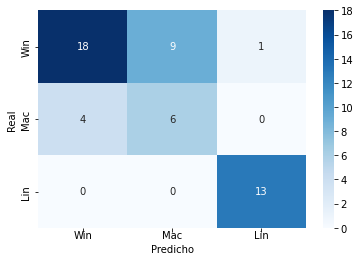

In [50]:
labels=['Win','Mac','Lin']
sns.heatmap(CM,annot=True,cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5,1.5,2.5],labels,va='center')
plt.yticks([0.5,1.5,2.5],labels,va='center')
plt.show()

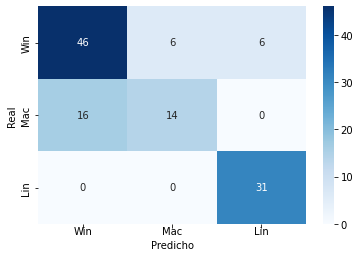

In [40]:
CM=confusion_matrix(Y_entreno,miprimeralogistica.predict(X_entreno))

labels=['Win','Mac','Lin']
sns.heatmap(CM,annot=True,cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5,1.5,2.5],labels,va='center')
plt.yticks([0.5,1.5,2.5],labels,va='center')
plt.show()

In [51]:
np.set_printoptions(formatter={'float':'{:.2f}'.format}) ## Para que al ver arreglos no aparezcan más de dos decimales

In [52]:
pd.set_option('display.precision',2)

In [53]:
Y_pred_prob=miprimeralogistica.predict_proba(X_testeo)

Prob=pd.DataFrame(Y_pred_prob,columns=['0','1','2'])
Prob['Result']=miprimeralogistica.predict(X_testeo)
Prob

,0,1,2,Result
0,0.84,1.59e-01,1.60e-04,0
1,0.39,3.35e-01,2.74e-01,0
2,0.14,8.65e-01,8.09e-08,1
3,0.70,2.99e-01,8.95e-06,0
4,0.45,5.52e-01,1.87e-03,1
5,0.29,7.14e-01,1.31e-47,1
6,0.11,5.79e-02,8.27e-01,2
7,0.24,1.12e-01,6.45e-01,2
8,0.61,3.85e-01,8.35e-04,0
9,0.99,7.99e-03,2.26e-12,0


In [54]:
Y_testeo_dummy=pd.get_dummies(Y_testeo)
Y_testeo_dummy

,0,1,2
158,1,0,0
166,1,0,0
45,0,1,0
106,0,1,0
141,1,0,0
75,1,0,0
39,0,0,1
2,0,0,1
132,1,0,0
83,1,0,0


In [55]:
fpr, tpr, umbrales=roc_curve(Y_testeo_dummy[0],Y_pred_prob[:,0])

0.8136645962732919


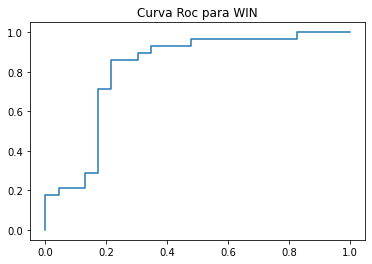

In [56]:
AUC=auc(fpr,tpr)
print(AUC)
plt.plot(fpr,tpr)
plt.title('Curva Roc para WIN')
plt.show()

In [57]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=AUC)

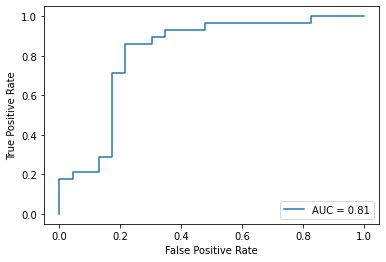

In [58]:
display.plot()

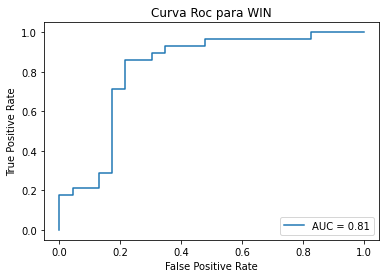

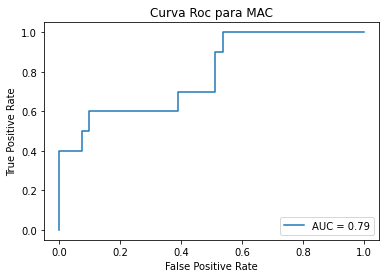

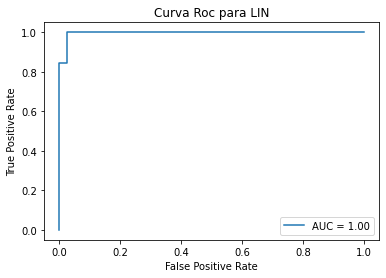

In [59]:
osd=['WIN','MAC','LIN']
for i in range(3):
    fpr, tpr, umbrales=roc_curve(Y_testeo_dummy[i],Y_pred_prob[:,i])
    AUC=auc(fpr,tpr)
    display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=AUC)
    display.plot()
    plt.title('Curva Roc para '+osd[i])
plt.show()


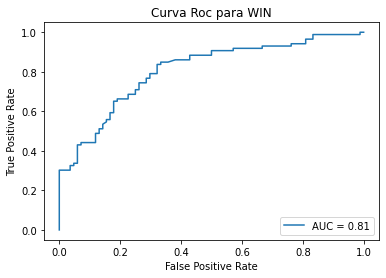

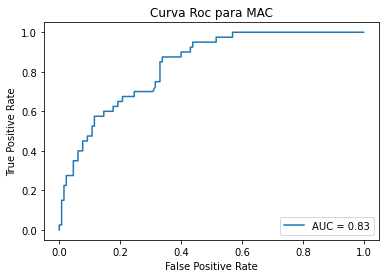

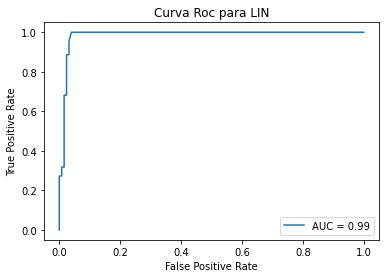

In [60]:
Y_prob=miprimeralogistica.predict_proba(X)
Y_dummy=pd.get_dummies(y)
for i in range(3):
    fpr, tpr, umbrales=roc_curve(Y_dummy[i],Y_prob[:,i])
    AUC=auc(fpr,tpr)
    display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=AUC)
    display.plot()
    plt.title('Curva Roc para '+osd[i])
plt.show()

In [61]:
miprimeralogistica.intercept_

array([-0.52, -0.45, 0.88])

In [62]:
miprimeralogistica.coef_

array([[-0.00, -0.55, 0.37, -0.03],
       [0.00, -0.07, -0.34, 0.06],
       [0.00, 0.56, 1.48, -0.92]])

## Guardar el modelo

A continuación vamos a guardar los parametros del modelo para utilizarlos después. Utilizamos el paquete pickle.

In [53]:
import pickle

pkl_filename = "logistica.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(miprimeralogistica, file)
    


In [54]:
import pickle
with open('logistica.pkl', 'rb') as file:
    pickle_model = pickle.load(file)
    
score = pickle_model.score(X_entreno, Y_entreno)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X)

Test score: 76.47 %


In [55]:
import numpy as np
Xsim=dict()
Xsim['duracion']=[i if i>0 else 0 for i in np.random.normal(loc=111,scale=202,size=100)]
Xsim['paginas']=[i if i>0 else 0 for i in np.random.normal(loc=2,scale=1,size=100)]
Xsim['acciones']=[i if i>0 else 0 for i in np.random.normal(loc=9,scale=4,size=100)]
Xsim['valor']=[i if i>0 else 0 for i in np.random.normal(loc=32,scale=20,size=100)]
DFsim=pd.DataFrame(data=Xsim)

In [56]:
DFsim

,duracion,paginas,acciones,valor
0,142.97,1.81,12.71,19.38
1,201.50,1.63,9.55,61.97
2,46.21,0.02,8.80,22.11
3,170.02,3.38,0.77,8.78
4,0.00,1.84,8.04,17.63
...,...,...,...,...
95,104.91,2.85,1.53,0.00
96,364.19,0.03,9.52,19.28
97,141.19,1.45,7.75,36.39
98,207.21,3.53,5.20,47.34


In [57]:
pickle_model.predict(DFsim)

array([2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2], dtype=int64)

## Conclusiones

En este apartado trabajamos en varias cosas:

1. Definimos la metodología del desarrollo y depliegue de modelos de clasificación supervisada. No solo nos apropiamos de la diferente terminología detras de los modelos de clasificación sino que exploramos varias formas de validarlo. 

2. Estudiamos algunos conceptos teóricos de la regresión logística y explicamos cuales son las entradas y salidas que se traza el módulo Logistic-Regression  en python.

3. La generalización de la regresión logística para múltiples categorías resulto útil para determinar el valor de clasificación en la predicción que estamos montando.

4. Hizo falta hablar sobre la significancia del modelo:

* Likelihood Ratio
* Pseudo R2
* Significancia de los predictores y prueba chi cuadrado.


